In [4]:
import numpy as np
from exact_solutions import GreenFunctionImages, GreenFunctionModes
import matplotlib.pyplot as plt 

In [6]:
R = 10.
H = 2.
Ny = 50
Nx = Ny * int( R // H)

x = np.linspace(-R, R, Nx )
y = np.linspace( 0, H, Ny )
X, Y = np.meshgrid(x,y)

kappa_e = 8.0

In [7]:
N_modes = 200
N_images = 400

c = (0,H/2 + 0.5)

Z_modes = np.reshape( GreenFunctionModes(kappa_e,H, np.stack([X.ravel(),Y.ravel()], axis=1), 0., c[1], M=N_modes), (Ny,Nx))
Z_images = np.reshape( GreenFunctionImages(kappa_e,H, np.stack([X.ravel(),Y.ravel()], axis=1), 0., c[1], M=N_images), (Ny,Nx))

Text(0.5, 1.0, 'difference: maximum difference ($\\ell^1$ norm): 0.011372129162780699')

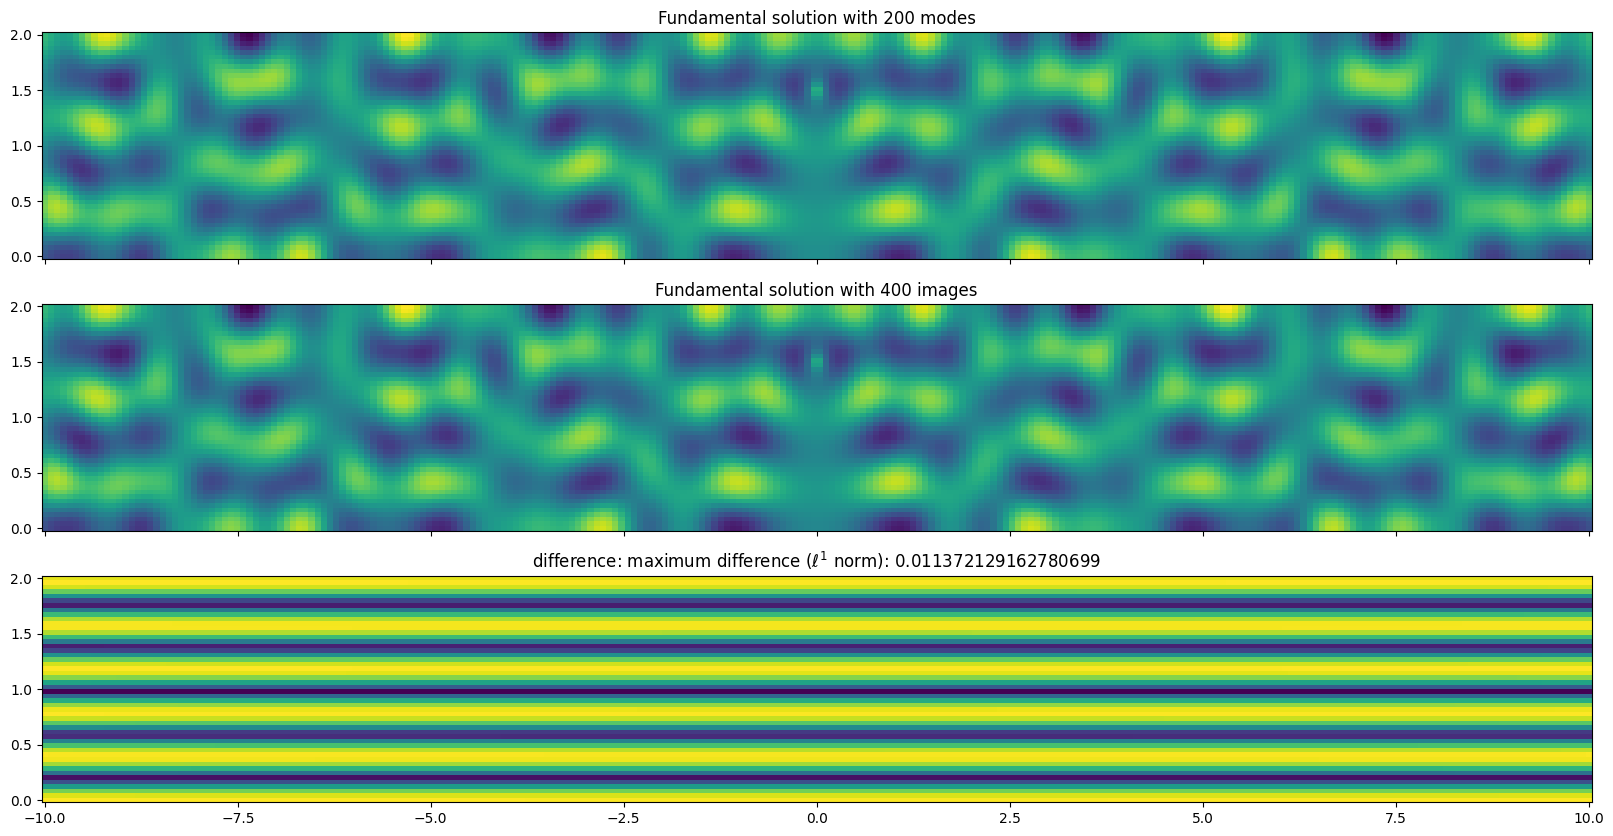

In [8]:
fig, ax = plt.subplots(nrows=3, figsize=(20,10), sharex=True)
ax[0].pcolormesh(X, Y, np.real(Z_modes))
ax[0].set_title(f'Fundamental solution with {N_modes} modes')
ax[1].pcolormesh(X, Y, np.real(Z_images))
ax[1].set_title(f'Fundamental solution with {N_images} images')

ax[2].pcolormesh(X, Y, np.abs(Z_modes - Z_images))
ax[2].set_title(f'difference: maximum difference ($\\ell^1$ norm): {np.max(np.abs(Z_modes - Z_images))}')

Text(0.5, 1.0, 'difference at $y=\\mathtt{ 0.000}$, $\\ell^1$ norm: 0.011372129162780699')

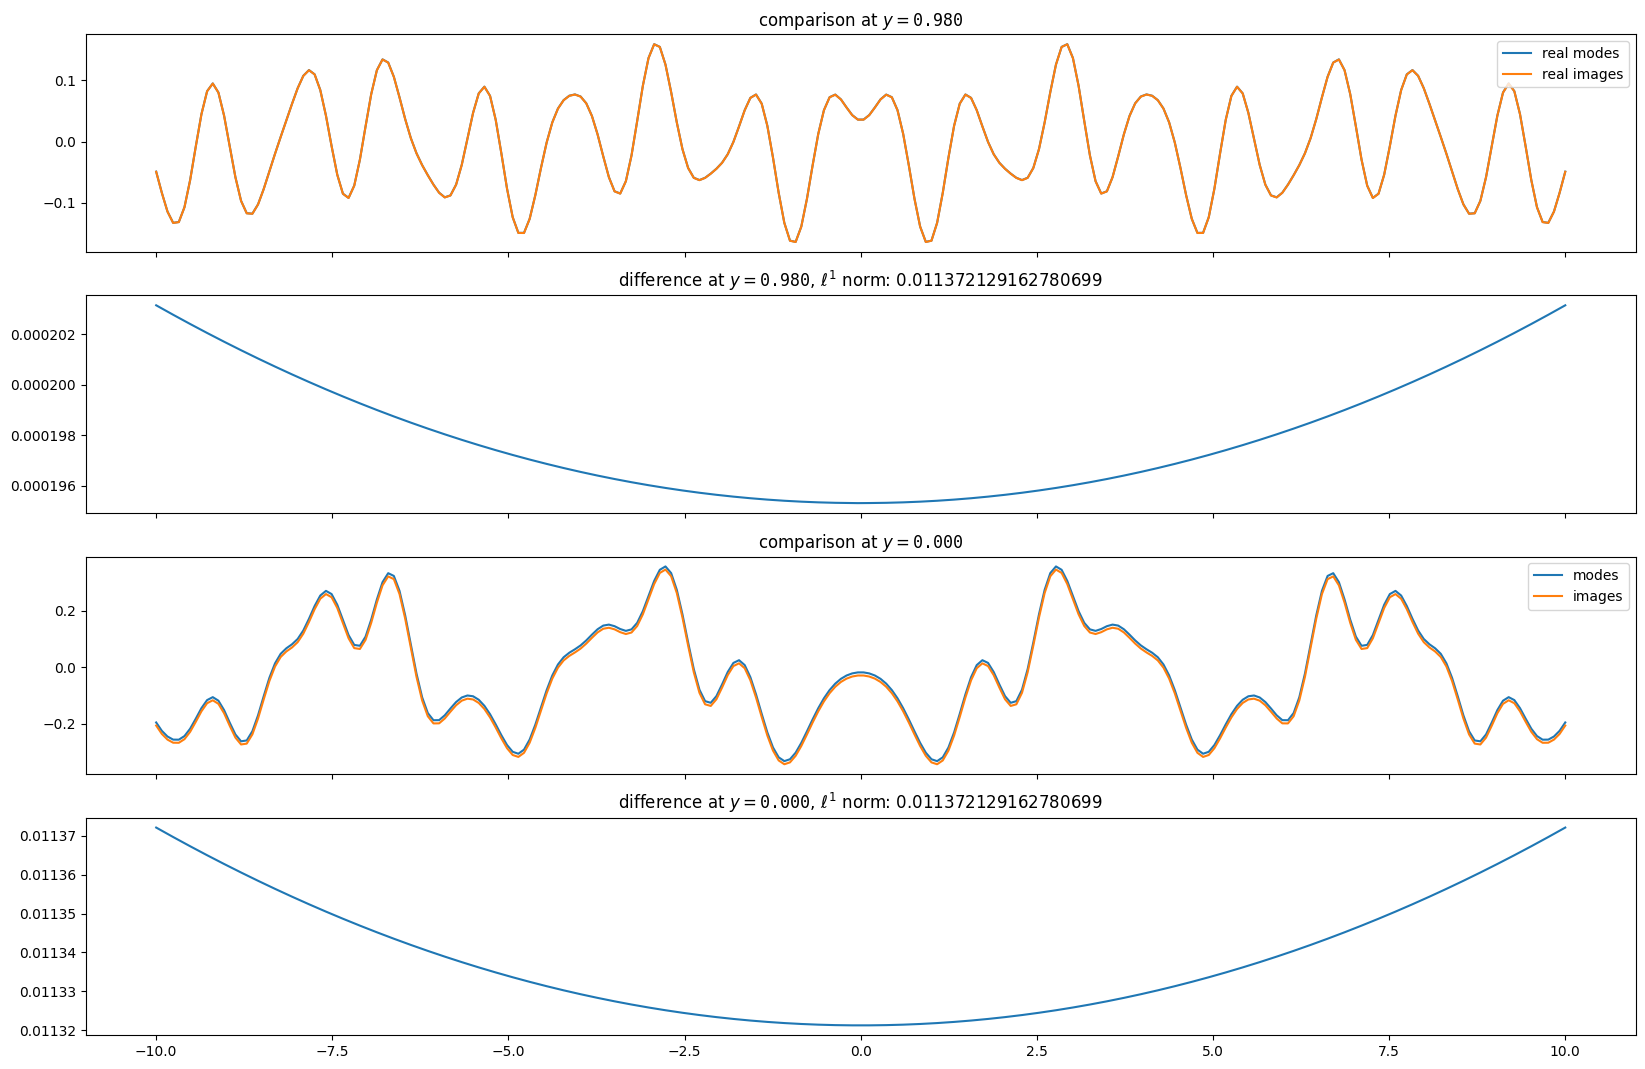

In [9]:
fig, ax = plt.subplots(nrows=4, figsize=(20,13), sharex=True)
i1 = 24
i2 = 0

ax[0].plot(x, np.real(Z_modes[i1,:]), label = 'real modes')
ax[0].plot(x, np.real(Z_images[i1,:]), label = 'real images')
ax[0].set_title(f'comparison at $y=\\mathtt{{{y[i1] : .3f}}}$')
ax[0].legend(loc='upper right')

ax[1].plot(x, np.abs(Z_modes - Z_images)[i1,:])
ax[1].set_title(f'difference at $y=\\mathtt{{{y[i1] : .3f}}}$, $\\ell^1$ norm: {np.max(np.abs(Z_modes - Z_images))}')



ax[2].plot(x, np.real(Z_modes[i2,:]), label='modes')
ax[2].plot(x, np.real(Z_images[i2,:]), label='images')
ax[2].set_title(f'comparison at $y=\\mathtt{{{y[i2] : .3f}}}$')
ax[2].legend(loc='upper right')

ax[3].plot(x, np.abs(Z_modes - Z_images)[i2,:])
ax[3].set_title(f'difference at $y=\\mathtt{{{y[i2] : .3f}}}$, $\\ell^1$ norm: {np.max(np.abs(Z_modes - Z_images))}')